# Data Collection

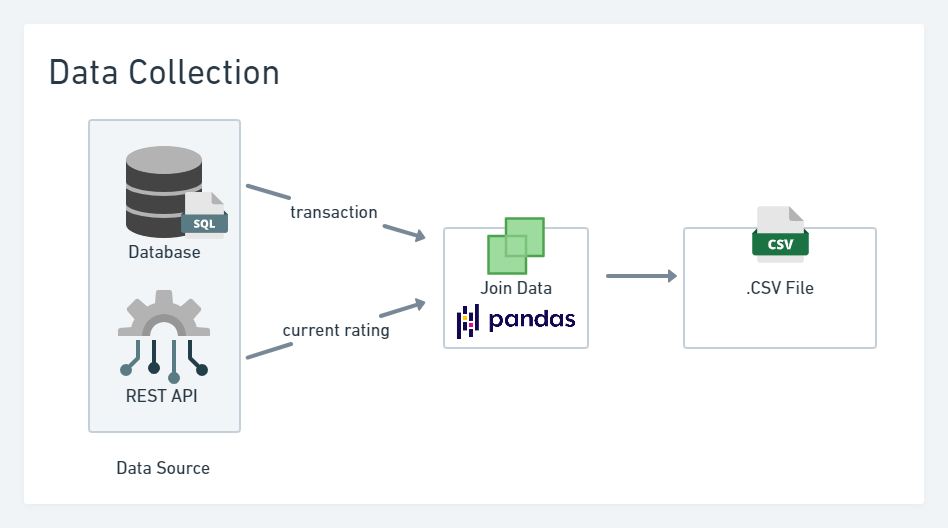

## Install PyMySQL 

In [ ]:
! pip install pymysql

     |████████████████████████████████| 43 kB 1.1 MB/s 


In [ ]:
# init MySQL config 
class Config:
  MYSQL_HOST = ''
  MYSQL_PORT = 3306 # default port of MySQL
  MYSQL_USER = ''
  MYSQL_PASSWORD = ''
  MYSQL_DB = ''
  MYSQL_CHARSET = 'utf8mb4'

## Connect to Database

In [ ]:
import pymysql.cursors

# Connect to the database
connection = pymysql.connect(host=Config.MYSQL_HOST,
                             port=Config.MYSQL_PORT,
                             user=Config.MYSQL_USER,
                             password=Config.MYSQL_PASSWORD,
                             db=Config.MYSQL_DB,
                             charset=Config.MYSQL_CHARSET,
                             cursorclass=pymysql.cursors.DictCursor)


## List Tables


In [ ]:
# list all tables
# create new cursor
cursor = connection.cursor()
#query
cursor.execute("show tables;")
tables = cursor.fetchall()
# close database cursor
cursor.close()
print(tables)

[{'Tables_in_r2de_ws1': 'online_retail'}]


- There is 1 table on this database (online_retail)



## Query Table

In [ ]:
with connection.cursor() as cursor:
  # Read a single record
  sql = "SELECT * FROM online_retail"
  cursor.execute(sql)
  result = cursor.fetchall()
print(f"number of rows: {len(result)}")

number of rows: 161331




## Convert to Pandas

In [ ]:
import pandas as pd

In [ ]:
# Creat retail pandas dataframe
retail = pd.DataFrame(result)

In [ ]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2018 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2018 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2018 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2018 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2018 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
161326,550638,22960,JAM MAKING SET WITH JARS,1,19/4/2019 15:44,8.29,NaN,United Kingdom
161327,550638,22961,JAM MAKING SET PRINTED,1,19/4/2019 15:44,1.45,NaN,United Kingdom
161328,550638,22978,PANTRY ROLLING PIN,1,19/4/2019 15:44,7.46,NaN,United Kingdom
161329,550638,22982,PANTRY PASTRY BRUSH,1,19/4/2019 15:44,2.46,NaN,United Kingdom




---


# Get data from REST API

In [ ]:
import requests

In [ ]:
url = "https://de-training-2020-7au6fmnprq-de.a.run.app/currency_gbp/all"
response = requests.get(url)

In [ ]:
type(response.text)

str

## Parsing Respose to Python Dictionary

In [ ]:
import json

In [ ]:
# Parsing to dictionary with json library
result_conversion_rate = json.loads(response.text)

In [ ]:
# Parsing to dictionary with request json function.
result_conversion_rate = response.json()

In [ ]:
print(type(result_conversion_rate))
# Assert if resule_conversion donesn't dictionary
assert isinstance(result_conversion_rate, dict)

<class 'dict'>


In [ ]:
# Convert conversion rate from api response to pandas dataframe
conversion_rate = pd.DataFrame.from_dict(result_conversion_rate)

In [ ]:
conversion_rate.head()

,Rate
2018-01-01T00:00:00.000Z,43.9991
2018-01-02T00:00:00.000Z,44.0731
2018-01-03T00:00:00.000Z,43.7025
2018-01-04T00:00:00.000Z,43.6914
2018-01-05T00:00:00.000Z,43.6490


In [ ]:
# Convert date index to columns date
conversion_rate = conversion_rate.reset_index().rename(columns={"index":"date"})

In [ ]:
conversion_rate.head()

,date,Rate
0,2018-01-01T00:00:00.000Z,43.9991
1,2018-01-02T00:00:00.000Z,44.0731
2,2018-01-03T00:00:00.000Z,43.7025
3,2018-01-04T00:00:00.000Z,43.6914
4,2018-01-05T00:00:00.000Z,43.6490


# Join the data

In [ ]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2018 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2018 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2018 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2018 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2018 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
161326,550638,22960,JAM MAKING SET WITH JARS,1,19/4/2019 15:44,8.29,NaN,United Kingdom
161327,550638,22961,JAM MAKING SET PRINTED,1,19/4/2019 15:44,1.45,NaN,United Kingdom
161328,550638,22978,PANTRY ROLLING PIN,1,19/4/2019 15:44,7.46,NaN,United Kingdom
161329,550638,22982,PANTRY PASTRY BRUSH,1,19/4/2019 15:44,2.46,NaN,United Kingdom


In [ ]:
# Create new invoiceTimeStamp column
retail['InvoiceTimestamp'] = retail['InvoiceDate']
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceTimestamp
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-01-12,2.55,17850.0,United Kingdom,2018-01-12
1,536365,71053,WHITE METAL LANTERN,6,2018-01-12,3.39,17850.0,United Kingdom,2018-01-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-01-12,2.75,17850.0,United Kingdom,2018-01-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-01-12,3.39,17850.0,United Kingdom,2018-01-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-01-12,3.39,17850.0,United Kingdom,2018-01-12
...,...,...,...,...,...,...,...,...,...
161326,550638,22960,JAM MAKING SET WITH JARS,1,2019-04-19,8.29,NaN,United Kingdom,2019-04-19
161327,550638,22961,JAM MAKING SET PRINTED,1,2019-04-19,1.45,NaN,United Kingdom,2019-04-19
161328,550638,22978,PANTRY ROLLING PIN,1,2019-04-19,7.46,NaN,United Kingdom,2019-04-19
161329,550638,22982,PANTRY PASTRY BRUSH,1,2019-04-19,2.46,NaN,United Kingdom,2019-04-19


In [ ]:
# Convert InvoiceDate column on retail dataframe 
# and date columns on conversion_rate dataframe to date 
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate']).dt.date
conversion_rate['date'] = pd.to_datetime(conversion_rate['date']).dt.date
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceTimestamp
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-01-12,2.55,17850.0,United Kingdom,2018-01-12
1,536365,71053,WHITE METAL LANTERN,6,2018-01-12,3.39,17850.0,United Kingdom,2018-01-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-01-12,2.75,17850.0,United Kingdom,2018-01-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-01-12,3.39,17850.0,United Kingdom,2018-01-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-01-12,3.39,17850.0,United Kingdom,2018-01-12


In [ ]:
conversion_rate.head()

,date,Rate
0,2018-01-01,43.9991
1,2018-01-02,44.0731
2,2018-01-03,43.7025
3,2018-01-04,43.6914
4,2018-01-05,43.6490


In [ ]:
# Join 2 dataframe with left join on InvoiceDate and date
final_df = retail.merge(conversion_rate, how="left", left_on="InvoiceDate", right_on="date")
final_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceTimestamp,date,Rate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-01-12,2.55,17850.0,United Kingdom,2018-01-12,2018-01-12,43.7705
1,536365,71053,WHITE METAL LANTERN,6,2018-01-12,3.39,17850.0,United Kingdom,2018-01-12,2018-01-12,43.7705
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-01-12,2.75,17850.0,United Kingdom,2018-01-12,2018-01-12,43.7705
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-01-12,3.39,17850.0,United Kingdom,2018-01-12,2018-01-12,43.7705
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-01-12,3.39,17850.0,United Kingdom,2018-01-12,2018-01-12,43.7705
...,...,...,...,...,...,...,...,...,...,...,...
161326,550638,22960,JAM MAKING SET WITH JARS,1,2019-04-19,8.29,NaN,United Kingdom,2019-04-19,2019-04-19,41.3622
161327,550638,22961,JAM MAKING SET PRINTED,1,2019-04-19,1.45,NaN,United Kingdom,2019-04-19,2019-04-19,41.3622
161328,550638,22978,PANTRY ROLLING PIN,1,2019-04-19,7.46,NaN,United Kingdom,2019-04-19,2019-04-19,41.3622
161329,550638,22982,PANTRY PASTRY BRUSH,1,2019-04-19,2.46,NaN,United Kingdom,2019-04-19,2019-04-19,41.3622


In [ ]:
# Create THBPrice column from UnitPrice * Rate
def get_thb_price(price, rate):
  
  return  price * rate
# Add THBPrice columns to final dataframe
final_df['THBPrice'] = final_df.apply(lambda x : get_thb_price(x["UnitPrice"], x["Rate"]), axis='columns')

In [ ]:
final_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceTimestamp,date,Rate,THBPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-01-12,2.55,17850.0,United Kingdom,2018-01-12,2018-01-12,43.7705,111.614775
1,536365,71053,WHITE METAL LANTERN,6,2018-01-12,3.39,17850.0,United Kingdom,2018-01-12,2018-01-12,43.7705,148.381995
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-01-12,2.75,17850.0,United Kingdom,2018-01-12,2018-01-12,43.7705,120.368875
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-01-12,3.39,17850.0,United Kingdom,2018-01-12,2018-01-12,43.7705,148.381995
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-01-12,3.39,17850.0,United Kingdom,2018-01-12,2018-01-12,43.7705,148.381995


## Save to CSV

In [ ]:
# Save final_df (pandas datafram to csv file)
final_df.to_csv("retail_data.csv", index=False)